In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import tqdm
from sklearn.preprocessing import StandardScaler

In [24]:
raw_data = pd.read_csv('gasNetworkData.csv',sep=';')
raw_data.shape

(11130, 36)

In [25]:
raw_data.columns

Index(['valve_1', 'valve_2', 'valve_3', 'valve_4', 'valve_5', 'valve_6',
       'valve_7', 'valve_8', 'valve_9', 'valve_10', 'valve_11', 'valve_12',
       'QGRS_1', 'QGRS_2', 'QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4',
       'PGRS_1', 'PGRS_2', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7',
       'P_8', 'P_9', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7'],
      dtype='object')

In [26]:
target_cols = raw_data.columns[0:12]
target_cols

Index(['valve_1', 'valve_2', 'valve_3', 'valve_4', 'valve_5', 'valve_6',
       'valve_7', 'valve_8', 'valve_9', 'valve_10', 'valve_11', 'valve_12'],
      dtype='object')

In [27]:
target = raw_data.loc[:,target_cols]
target

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12
0,"0,860935131101830","0,443690341751272","0,306734723527336",1,"0,728952386417998",1,"0,663010027987112",1,"0,226940949546093","0,327048728627096","0,773152610822237",1
1,"0,557628112717696","0,615052739035936","0,613399816639125","0,103841293984277","0,687016867991777","0,348602013890892","0,763176606240104","0,476247464021696","0,921243097913534","0,310912878234729","0,965570839160880","0,989103178285138"
2,"0,926283828947032","0,940593968270936","0,858182824779650",1,"0,532250005303113","0,892400395807789","0,434811654542966","0,902981554636009","0,841641361354440","0,677519785301249","0,222159702483008","0,898325035148447"
3,"0,684077227664180","0,410385988679130","0,557988284128745","0,365850373375530","0,557272248622489","0,673942238593092","0,930404985581838","0,517680904588643","0,345683334056538","0,988507049630545","0,747792783919699","0,917262246039183"
4,"0,770425972549917","0,610020400388203","0,361751254505974","0,466569039044896","0,812129352412714","0,628493651959623",1,"0,214384455568788","0,428915430996674",1,"0,751079320515859","0,631920850191193"
...,...,...,...,...,...,...,...,...,...,...,...,...
11125,"0,956727540624397","0,797923997948746","0,815061039112970","0,956310115141835","0,990342007007414",1,"0,859566960237701","0,515889494076692","0,967920493616515","0,788160952349596","0,585831512989578","0,972478299803880"
11126,"0,649654129393418","0,899461083011071","0,842555105732534","0,586798218636199","0,753147582651722","0,716471365683146","0,797627861101304","0,436621082228391","0,400500061555711","0,879696244186072",1,"0,689277554717704"
11127,"0,976060358350114",1,"0,528202496463434","0,616026070128366","0,428343913594261","0,445463067779225",1,"0,550823655003863","0,959922750971558","0,961275538776676","0,621718542468407","0,947176407274324"
11128,"0,744830834751292","0,832445910952698",1,1,"0,866269998807597","0,692503721328868","0,930798017857132","0,696483909096807","0,873366697691039","0,759116503663067","0,929455805689470","0,567230752955293"


In [28]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 0 to 11129
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   valve_1   11130 non-null  object
 1   valve_2   11130 non-null  object
 2   valve_3   11130 non-null  object
 3   valve_4   11130 non-null  object
 4   valve_5   11130 non-null  object
 5   valve_6   11130 non-null  object
 6   valve_7   11130 non-null  object
 7   valve_8   11130 non-null  object
 8   valve_9   11130 non-null  object
 9   valve_10  11130 non-null  object
 10  valve_11  11130 non-null  object
 11  valve_12  11130 non-null  object
dtypes: object(12)
memory usage: 1.0+ MB


In [32]:
for c in target_cols:
    target[c]=target[c].apply(lambda x: x.replace(',','.'))
    target[c] = pd.to_numeric(target[c])
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 0 to 11129
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   valve_1   11130 non-null  float64
 1   valve_2   11130 non-null  float64
 2   valve_3   11130 non-null  float64
 3   valve_4   11130 non-null  float64
 4   valve_5   11130 non-null  float64
 5   valve_6   11130 non-null  float64
 6   valve_7   11130 non-null  float64
 7   valve_8   11130 non-null  float64
 8   valve_9   11130 non-null  float64
 9   valve_10  11130 non-null  float64
 10  valve_11  11130 non-null  float64
 11  valve_12  11130 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [6]:
data = raw_data.drop(target_cols, axis=1)
data

,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,...,P_7,P_8,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7
0,"17,9117333847702","9,25721668129090","1,12235116629161","2,14811180481231","5,62486384504036","8,07628028535501","303535,895746234","261828,526727504","213391,443356607","202884,784496348",...,"257146,643681652","202885,460552283","255259,392424895","1,16416400419936","0,637043719752352","0,644746412613880","0,658984404309333","0,685890774893295","2,60887931892526","1,06968992882054"
1,"12,4865332935887","12,7587078036397","2,30466448825028","1,55449486572821","5,69146820919799","6,55711993756448","259089,603893917","265774,736883873","200047,438509444","183655,815191168",...,"223286,262627720","196699,095175719","238643,246117119","1,07643481424983","0,562278143587683","0,569549564898318","0,585703045422126","0,574111509500283","2,51238976446100","1,02233416903158"
2,"17,9703917704951","17,0240033074823","5,57802340375466","5,40181829614256","2,07457450153685","9,85653225730779","335750,327166171","336835,812258748","233045,722524354","223744,966298327",...,"298800,614358995","262389,026328002","293994,294137757","1,29452774836299","0,701013413471286","0,703571950674222","0,788734451082702","0,768666866063614","3,18220929781866","1,49135625187522"
3,"15,0057481817523","8,79696028847937","0,337839701670987","4,37587144506473","4,14584822388578","5,85400321143198","272960,153141083","241815,279447415","186600,436159624","182034,791019788",...,"233255,897429829","199985,852735390","236028,488239937","0,984928863600524","0,505335786508554","0,546834786460099","0,620039607653434","0,576220787173363","2,50943694887510","1,07898379061489"
4,"15,9127123829977","12,3456042650049","1,50029713830827","5,55869151558247","5,01767518612804","5,78928965883885","307262,657559923","281568,675597809","225327,277278218","203905,378695646",...,"256806,969882025","208319,243658322","269020,144560718","1,26485428159047","0,643253133444022","0,636142023610649","0,683626054610504","0,700243374210256","2,90373279908769","1,13583196264195"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,"18,9402094630806","15,4442063088439","4,23236547433950","4,86421339033152","4,35899401286312","9,41294632580618","327203,583852404","306342,292409064","248022,232212322","216171,234649390",...,"278350,536151068","246179,329685145","275926,527601990","1,39169769079435","0,692310934302181","0,650632109768869","0,734543044304734","0,723743399475903","2,97192571321148","1,37750392051625"
11126,"13,7322957931164","17,1339344017796","1,54764839027709","5,09792155663073","6,78294515758375","6,50573064324373","295028,591344551","314245,044656877","231879,476997043","206855,792673533",...,"266737,833821876","236242,215443964","272689,266035045","1,32179372554871","0,650962511355734","0,645469410203864","0,691534764968377","0,700180308167877","2,71254106872517","1,33063297796344"
11127,"18,7774093371591","18,0288860030015","4,38753497864583","6,06554123455582","4,81223109296155","10,3297639807421","339144,738615351","338404,036239099","215846,326423787","210406,192475949",...,"293910,779353923","246525,931367049","293041,686340173","1,19117390174673","0,650510592221980","0,655221369558734","0,739966641256095","0,734723547847398","3,25962999464375","1,35584659861358"
11128,"15,2783321218055","15,9626958603038","3,29580976821237","4,35971133172992","6,36036541611910","5,80415747557710","310711,401135696","311020,506430643","243310,261941182","212851,932756948",...,"280834,742972514","251630,478156037","283519,353328567","1,37761764478979","0,659784240685774","0,625305515363106","0,704000560215220","0,690051974288589","2,80302776870907","1,39640553099497"


In [227]:
Q_cols = []
P_cols = []
Q_plants = ['QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4']
for c in data.columns:
    if 'Q_' in c:
        Q_cols.append(c)
    elif 'P_' in c:
        P_cols.append(c)
        

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 0 to 11129
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   QGRS_1    11130 non-null  object
 1   QGRS_2    11130 non-null  object
 2   QPlant_1  11130 non-null  object
 3   QPlant_2  11130 non-null  object
 4   QPlant_3  11130 non-null  object
 5   QPlant_4  11130 non-null  object
 6   PGRS_1    11130 non-null  object
 7   PGRS_2    11130 non-null  object
 8   P_1       11130 non-null  object
 9   P_2       11130 non-null  object
 10  P_3       11130 non-null  object
 11  P_4       11130 non-null  object
 12  P_5       11130 non-null  object
 13  P_6       11130 non-null  object
 14  P_7       11130 non-null  object
 15  P_8       11130 non-null  object
 16  P_9       11130 non-null  object
 17  Q_1       11130 non-null  object
 18  Q_2       11130 non-null  object
 19  Q_3       11130 non-null  object
 20  Q_4       11130 non-null  object
 21  Q_5       11

In [35]:
for c in data.columns:
    data[c]=data[c].apply(lambda x: x.replace(',','.'))
    data[c] = pd.to_numeric(data[c])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 0 to 11129
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   QGRS_1    11130 non-null  float64
 1   QGRS_2    11130 non-null  float64
 2   QPlant_1  11130 non-null  float64
 3   QPlant_2  11130 non-null  float64
 4   QPlant_3  11130 non-null  float64
 5   QPlant_4  11130 non-null  float64
 6   PGRS_1    11130 non-null  float64
 7   PGRS_2    11130 non-null  float64
 8   P_1       11130 non-null  float64
 9   P_2       11130 non-null  float64
 10  P_3       11130 non-null  float64
 11  P_4       11130 non-null  float64
 12  P_5       11130 non-null  float64
 13  P_6       11130 non-null  float64
 14  P_7       11130 non-null  float64
 15  P_8       11130 non-null  float64
 16  P_9       11130 non-null  float64
 17  Q_1       11130 non-null  float64
 18  Q_2       11130 non-null  float64
 19  Q_3       11130 non-null  float64
 20  Q_4       11130 non-null  fl

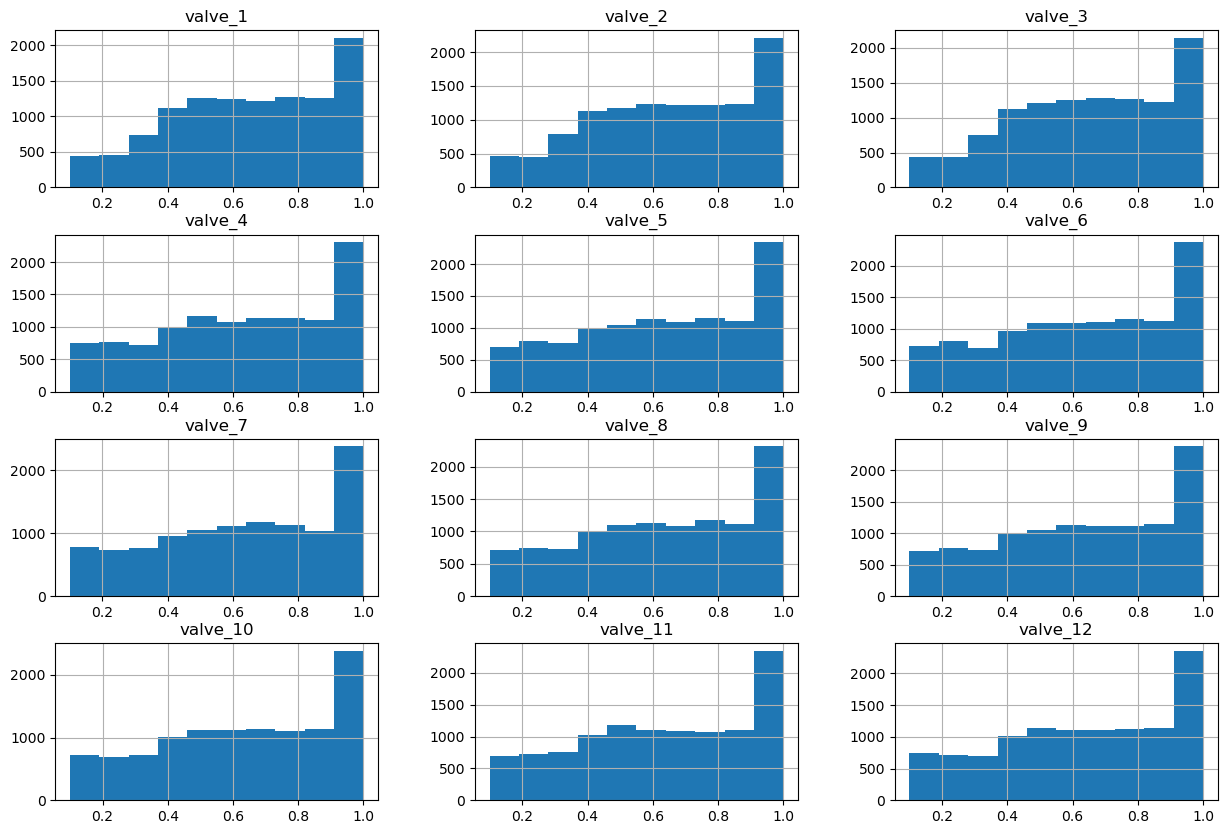

In [44]:
target.hist(figsize=(15,10))
plt.show()

In [95]:
target.describe()

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,0.649333,0.650441,0.651500,0.632381,0.633562,0.635640,0.632167,0.634766,0.636231,0.637568,0.633175,0.635748
std,0.245263,0.248340,0.244107,0.268551,0.268633,0.268604,0.270148,0.267528,0.268786,0.267212,0.267285,0.267610
min,0.100121,0.100162,0.100120,0.100031,0.100010,0.100334,0.100116,0.100066,0.100120,0.100006,0.100100,0.100157
25%,0.461452,0.455689,0.462317,0.426608,0.423706,0.428028,0.422741,0.427428,0.425409,0.430737,0.425925,0.429863
50%,0.663143,0.662528,0.664498,0.649480,0.652760,0.658192,0.651626,0.652095,0.655223,0.655571,0.646081,0.651261
75%,0.863334,0.869543,0.859904,0.874653,0.872085,0.874622,0.876031,0.873373,0.876682,0.879710,0.872142,0.876680
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


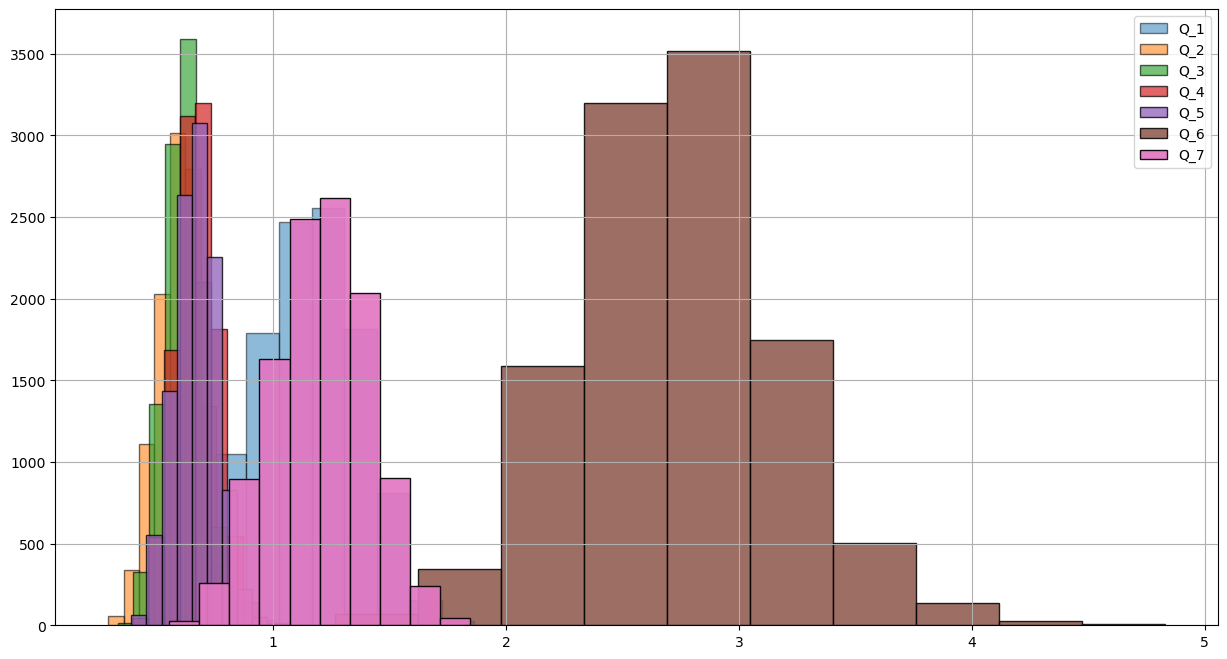

In [57]:
i=0;
fig, axes = plt.sub
for c in data.columns:
    if 'Q_' in c:
        data[c].hist(label=c, figsize=(15,8),edgecolor='k', alpha=(0.5+i/14))
        i+=1
plt.legend()
plt.show()

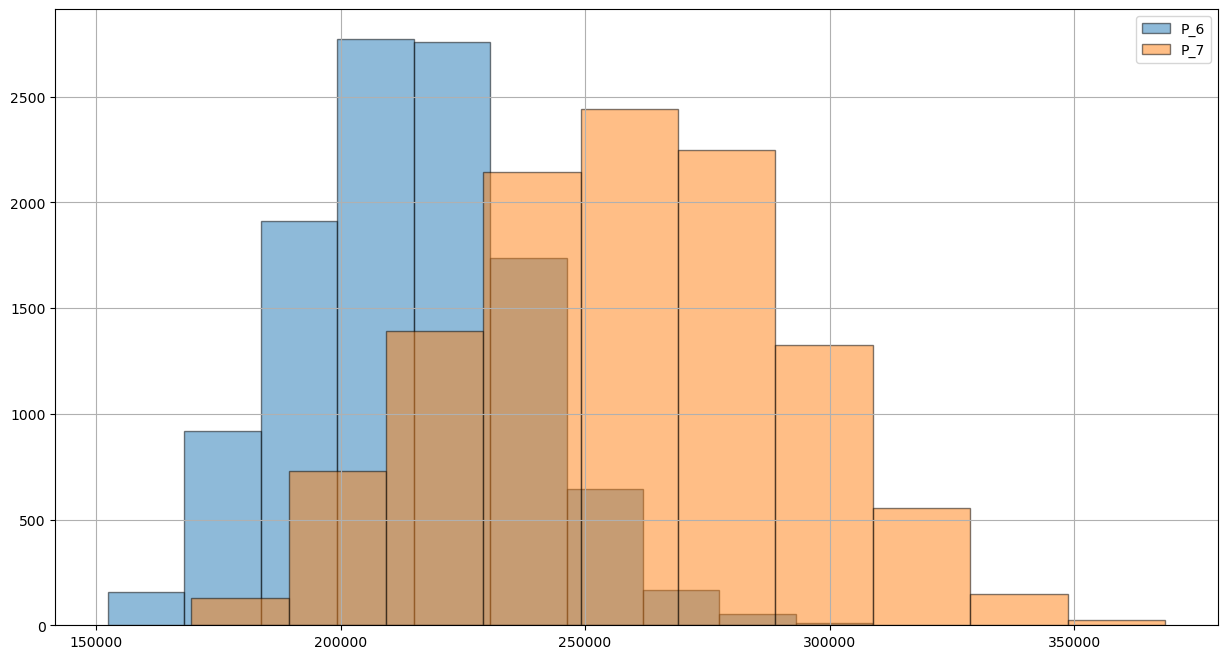

In [61]:
i=0;
data['P_6'].hist(label='P_6', figsize=(15,8),edgecolor='k', alpha=(0.5))
data['P_7'].hist(label='P_7', figsize=(15,8),edgecolor='k', alpha=(0.5))

plt.legend()
plt.show()

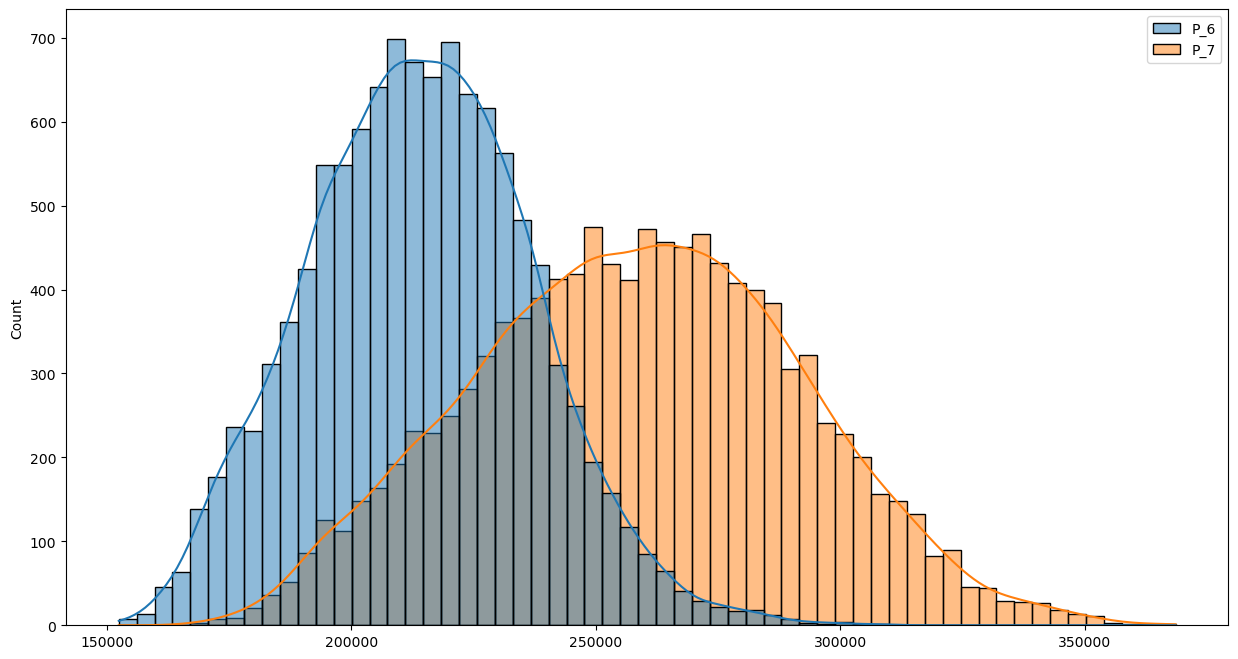

In [68]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data=data[['P_6','P_7']], kde=True, ax=axes)
plt.show()

In [ ]:
data['P_2']-data['P_1']
data['Q_2']+data['Q_1']

In [98]:
def corr_plot(X,Y):
    fig, axes = plt.subplots(figsize=(15,8))
    
    axes.plot(X,Y,'.', alpha=0.5)


    axes.vlines(X.mean(),Y.min(),Y.max(), colors='r',linewidth=2.75)
    axes.hlines(Y.mean(),X.min(), X.max(), colors='g', linewidth=2.75)

    plt.show()

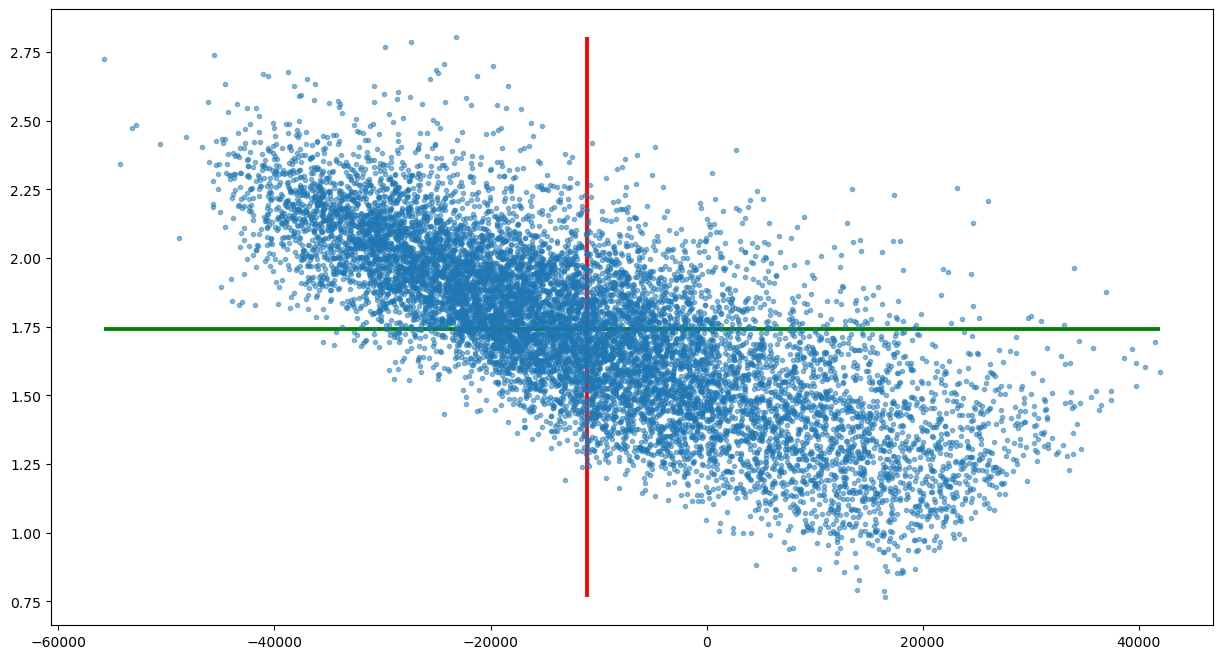

In [99]:
corr_plot(data['P_2']-data['P_1'],data['Q_2']+data['Q_1'])

In [89]:
(data['P_2']-data['P_1']).corr(data['Q_2']+data['Q_1'])

-0.762951672931163

In [197]:
data['P_4'].corr(data['Q_4'])

0.9839603273226174

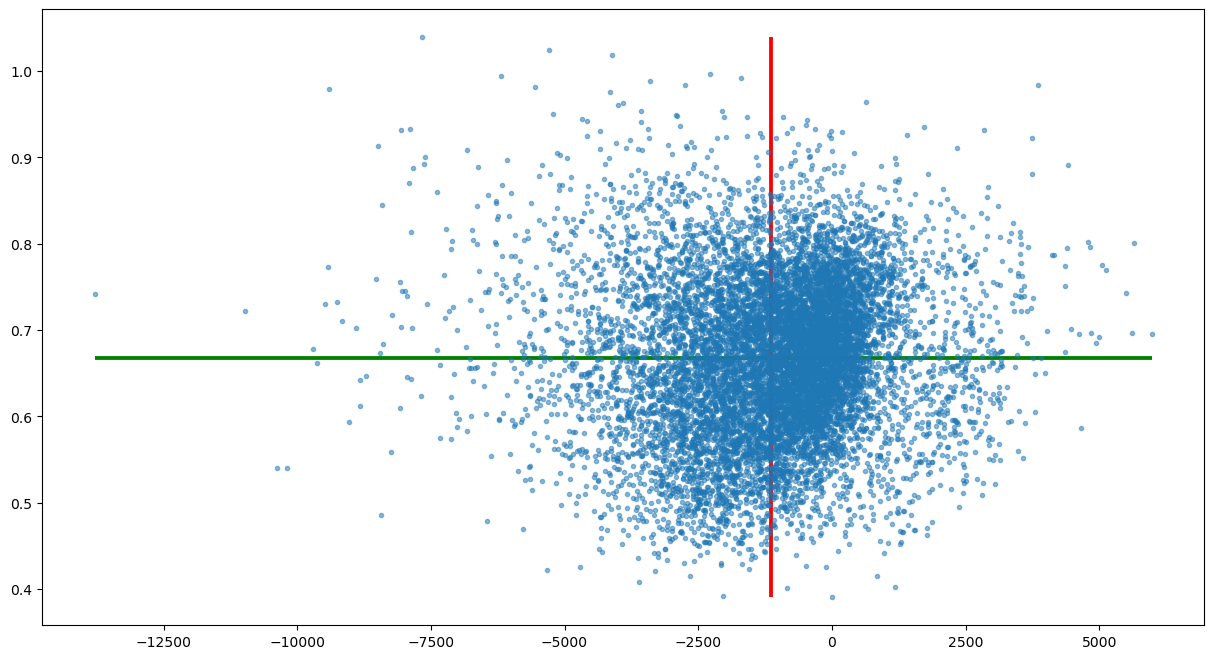

In [275]:
corr_plot(data['P_6']-data['P_5'],data['Q_5'])

In [ ]:
(target['valve_6']).corr(data['Q_7'])

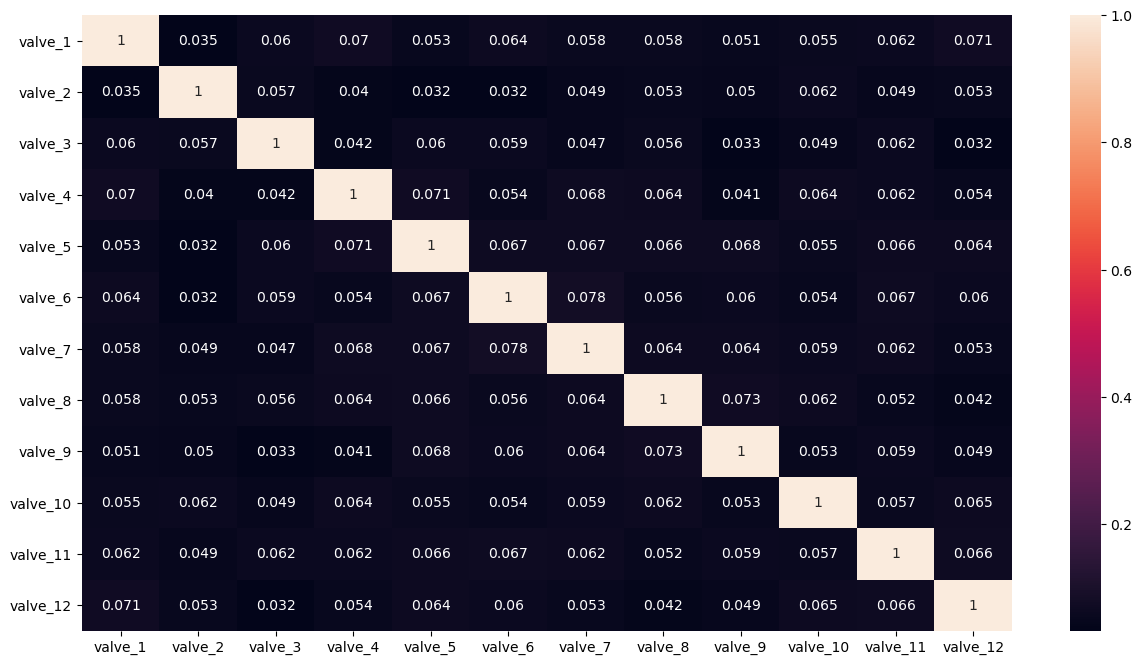

In [143]:
fig ,ax = plt.subplots(figsize=(15,8))
sns.heatmap(target.corr(), annot=True, ax=ax)
plt.show()

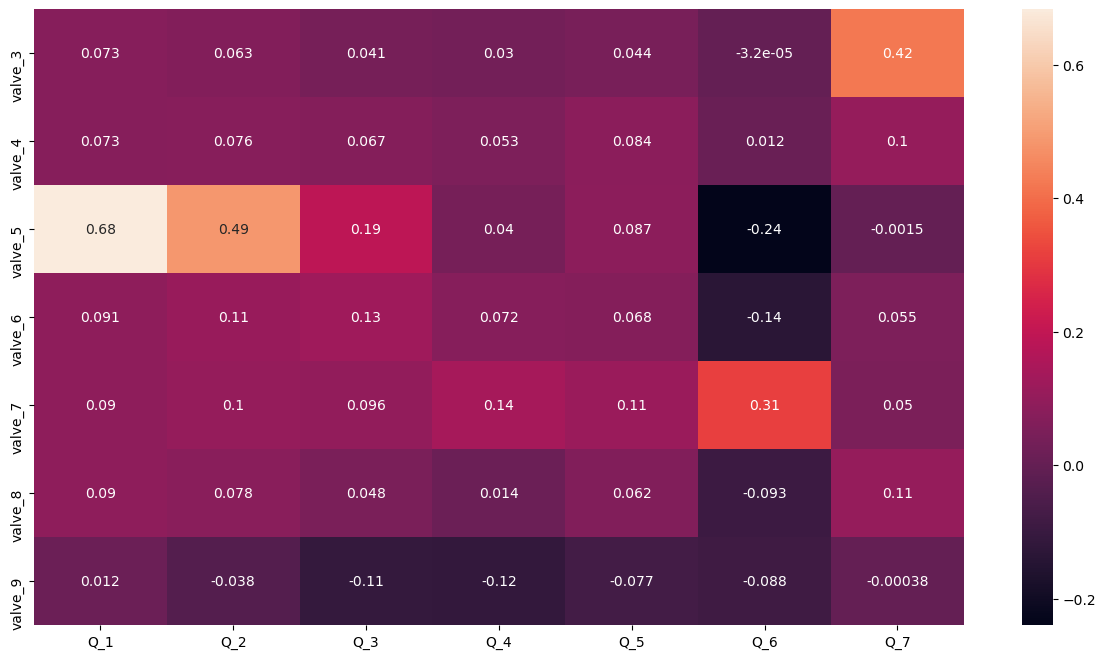

In [140]:
fig ,ax = plt.subplots(figsize=(15,8))
sns.heatmap((data[Q_cols].join(target)).corr().loc['valve_3':'valve_9','Q_1':'Q_7'], annot=True, ax=ax)
plt.show()

In [127]:
data[Q_cols].corrwith(target)

Q_1        NaN
Q_2        NaN
Q_3        NaN
Q_4        NaN
Q_5        NaN
Q_6        NaN
Q_7        NaN
valve_1    NaN
valve_10   NaN
valve_11   NaN
valve_12   NaN
valve_2    NaN
valve_3    NaN
valve_4    NaN
valve_5    NaN
valve_6    NaN
valve_7    NaN
valve_8    NaN
valve_9    NaN
dtype: float64

In [236]:
target.describe()

,valve_1,valve_2,valve_3,valve_4,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,0.649333,0.650441,0.651500,0.632381,0.633562,0.635640,0.632167,0.634766,0.636231,0.637568,0.633175,0.635748
std,0.245263,0.248340,0.244107,0.268551,0.268633,0.268604,0.270148,0.267528,0.268786,0.267212,0.267285,0.267610
min,0.100121,0.100162,0.100120,0.100031,0.100010,0.100334,0.100116,0.100066,0.100120,0.100006,0.100100,0.100157
25%,0.461452,0.455689,0.462317,0.426608,0.423706,0.428028,0.422741,0.427428,0.425409,0.430737,0.425925,0.429863
50%,0.663143,0.662528,0.664498,0.649480,0.652760,0.658192,0.651626,0.652095,0.655223,0.655571,0.646081,0.651261
75%,0.863334,0.869543,0.859904,0.874653,0.872085,0.874622,0.876031,0.873373,0.876682,0.879710,0.872142,0.876680
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


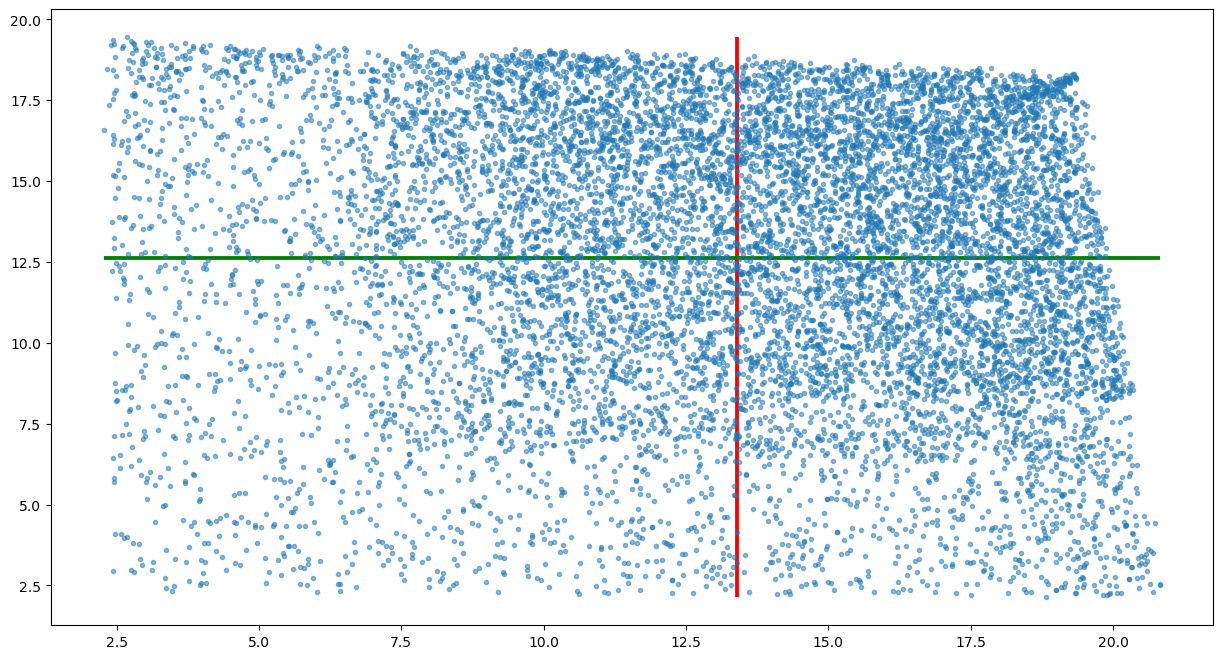

In [167]:
corr_plot(data['QGRS_1'], data['QGRS_2'])

In [150]:
data[Q_cols].describe()

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,1.145158,0.598114,0.616593,0.670422,0.667425,2.728442,1.207946
std,0.223663,0.093666,0.081292,0.087374,0.090251,0.434747,0.202850
min,0.465126,0.290572,0.333130,0.394874,0.390704,1.264999,0.552228
25%,0.986792,0.535757,0.561330,0.610544,0.605596,2.438076,1.068076
50%,1.152996,0.601834,0.616413,0.669281,0.667463,2.723682,1.212381
75%,1.306001,0.663203,0.668508,0.727240,0.729057,3.004446,1.352988
max,1.863777,0.954990,0.999437,1.071623,1.039044,4.828973,1.846622


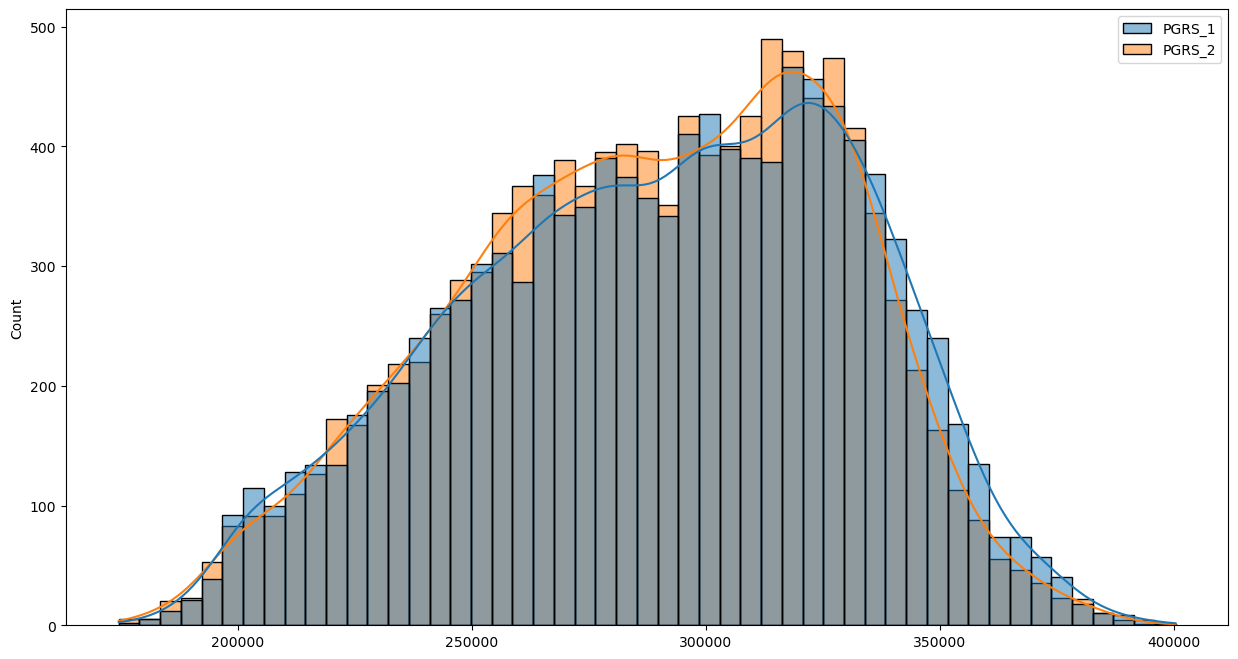

In [166]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data[['PGRS_1','PGRS_2']], kde=True, ax=axes)

plt.show()

In [210]:
sp.stats.normaltest(data['Q_4'].values)

NormaltestResult(statistic=124.79187133383492, pvalue=7.9760789967392985e-28)

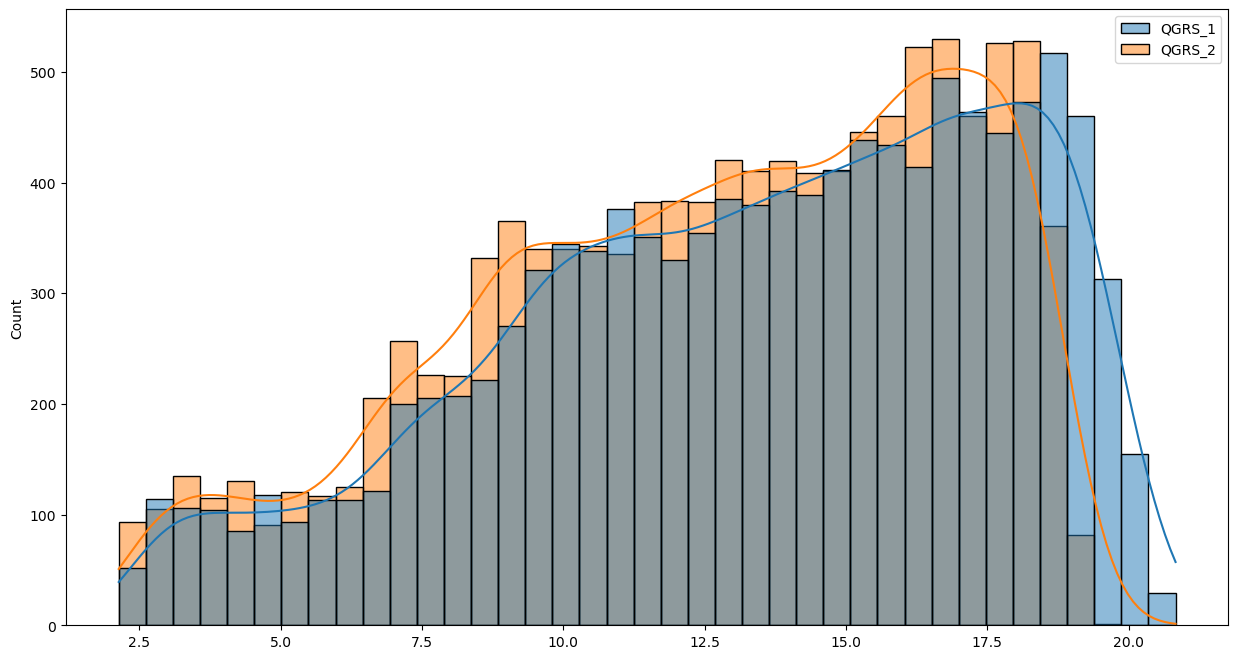

In [165]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(data[['QGRS_1','QGRS_2']], kde=True, ax=axes)
plt.show()

In [185]:
fig ,ax = plt.subplots(figsize=(15,8))
sns.heatmap(data[P_cols], annot=True, ax=ax)
plt.show()

KeyboardInterrupt: 

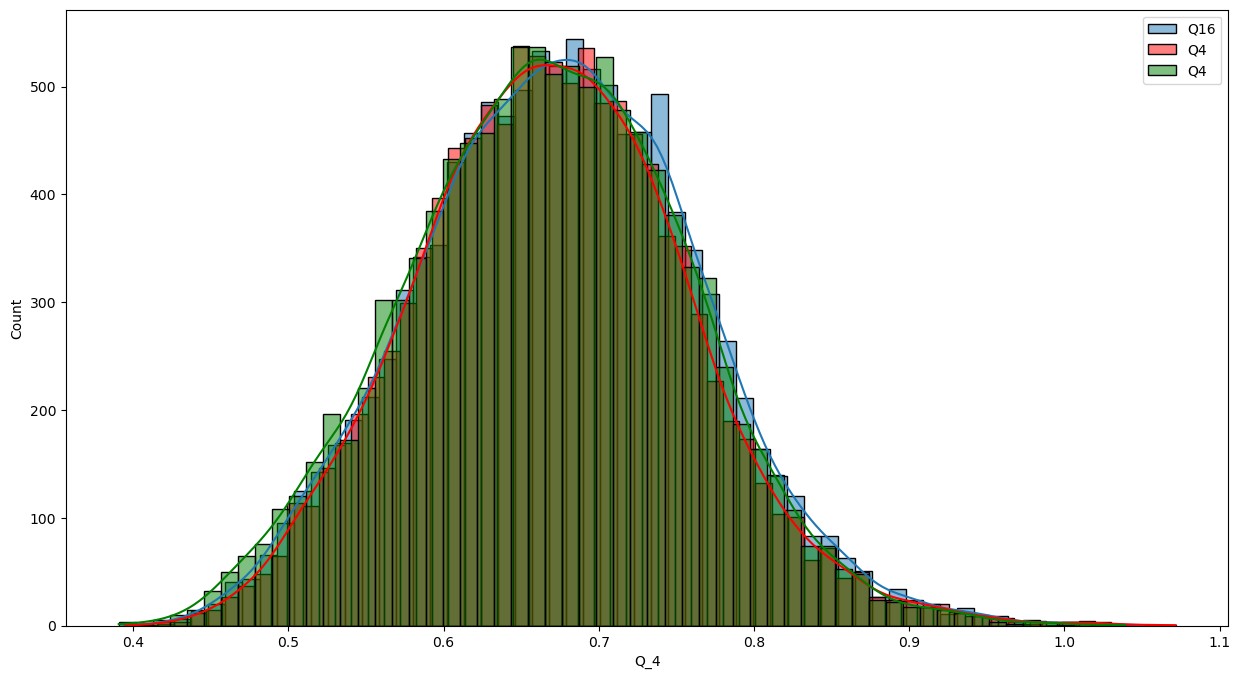

In [215]:
fig ,ax = plt.subplots(figsize=(15,8))


sns.histplot(data['Q_4']*data['P_5']/data['P_4'], kde=True, ax=ax, label='Q16')
sns.histplot(data['Q_4'], kde=True, ax=ax, label='Q4',color='r')
sns.histplot(data['Q_5'], kde=True, ax=ax, label='Q4',color='g')


plt.legend()
plt.show()

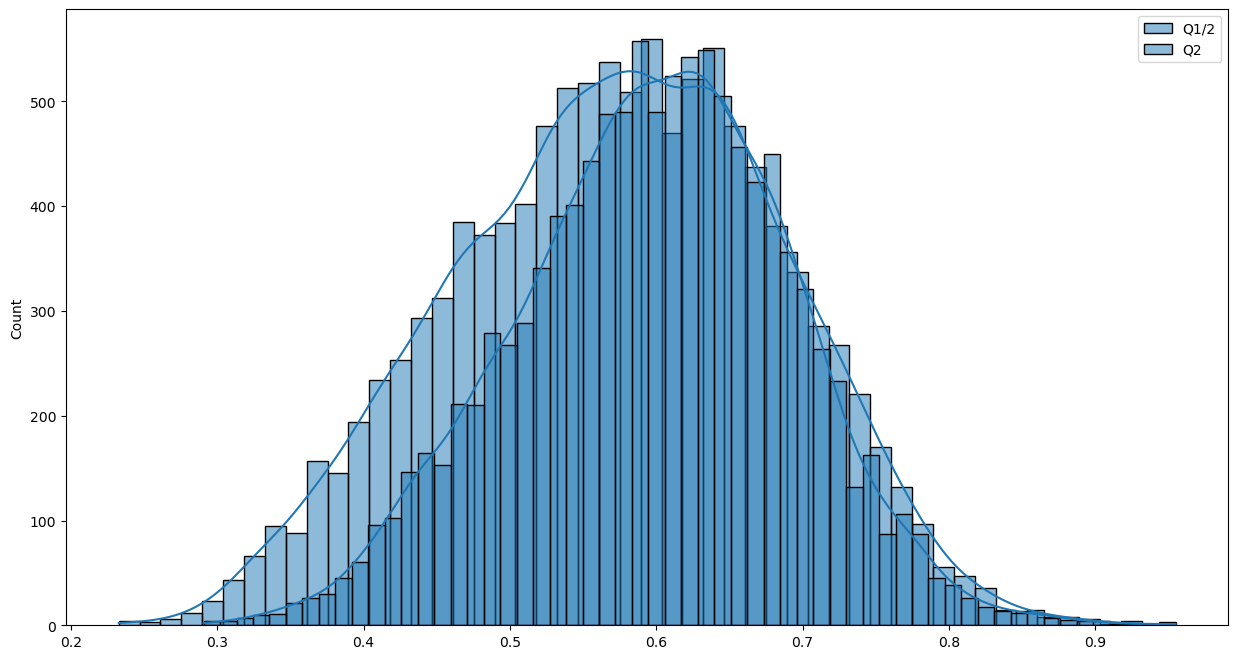

In [282]:
fig ,ax = plt.subplots(figsize=(15,8))
#sns.histplot(data['Q_4'], kde=True, ax=ax, label='Q4',color='r')
#sns.histplot(data['Q_5'], kde=True, ax=ax, label='Q5',color='g')
sns.histplot(np.array(data['Q_1']/2).reshape(-1, 1), kde=True, ax=ax, label='Q1/2',color='b')
sns.histplot(np.array(data['Q_2']).reshape(-1, 1), kde=True, ax=ax, label='Q2',color='r')
#sns.histplot(data['P_6']-data['P_7'], kde=True, ax=ax, label='Q12')
plt.legend()
plt.show()

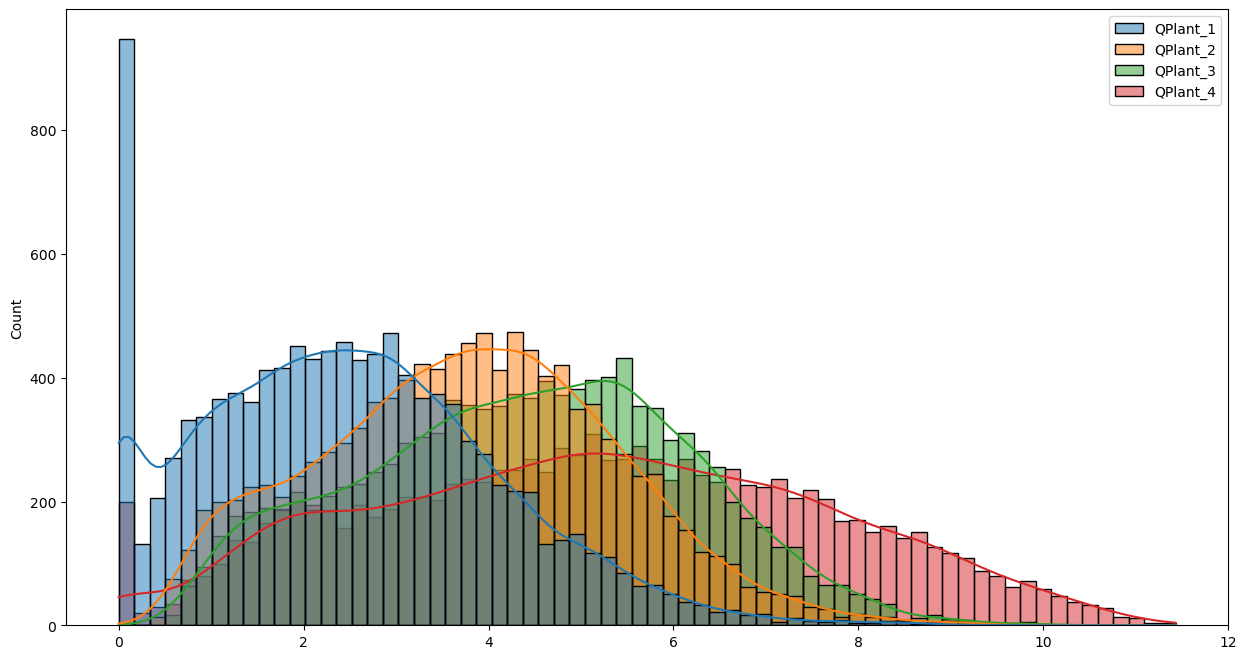

In [229]:
fig ,ax = plt.subplots(figsize=(15,8))


sns.histplot(data['QPlant_1'], kde=True, ax=ax)
plt.show()

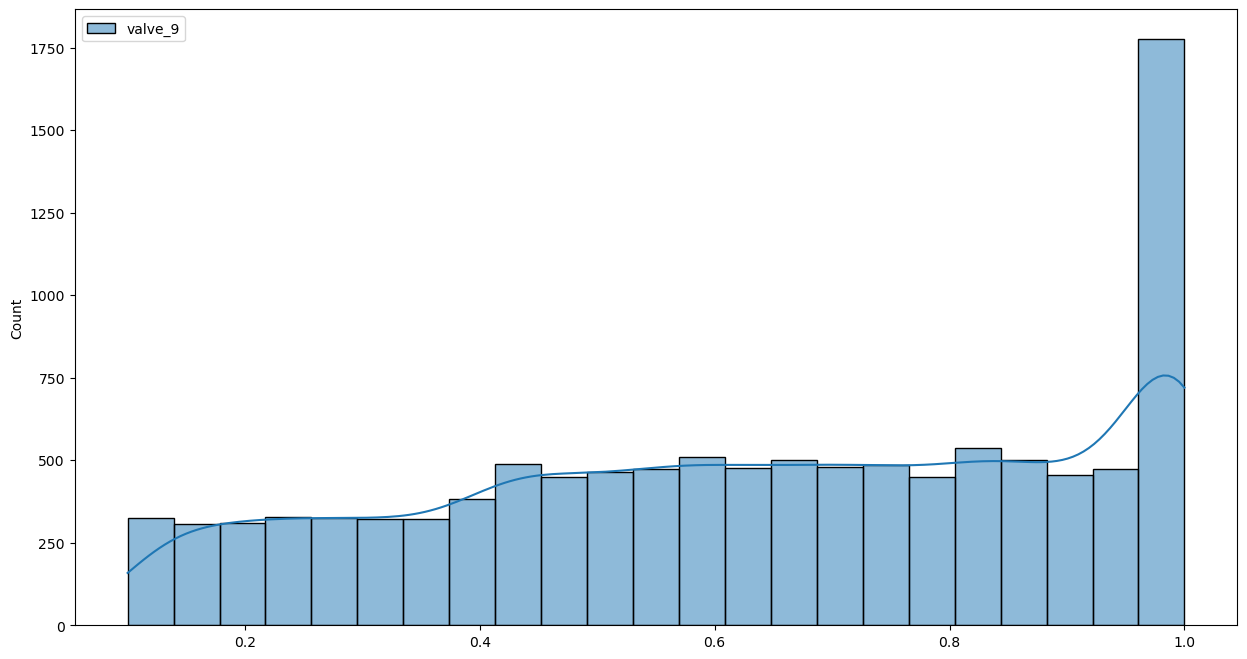

In [234]:
fig ,ax = plt.subplots(figsize=(15,8))

sns.histplot(target[['valve_9']], kde=True, ax=ax)
plt.show()



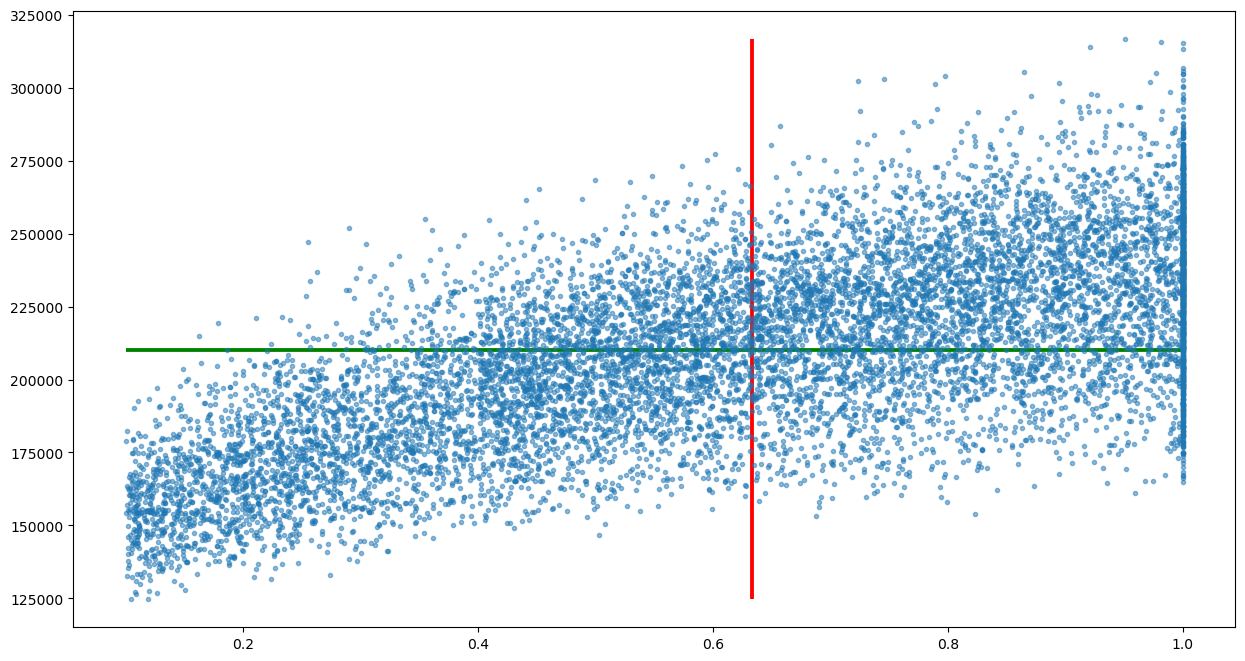

In [238]:
corr_plot(target['valve_5'],data['P_1'])

In [244]:
data['QPlant_2'].mean()

3.79334421806244

In [245]:
data['QPlant_3'].mean()

4.396892975036758

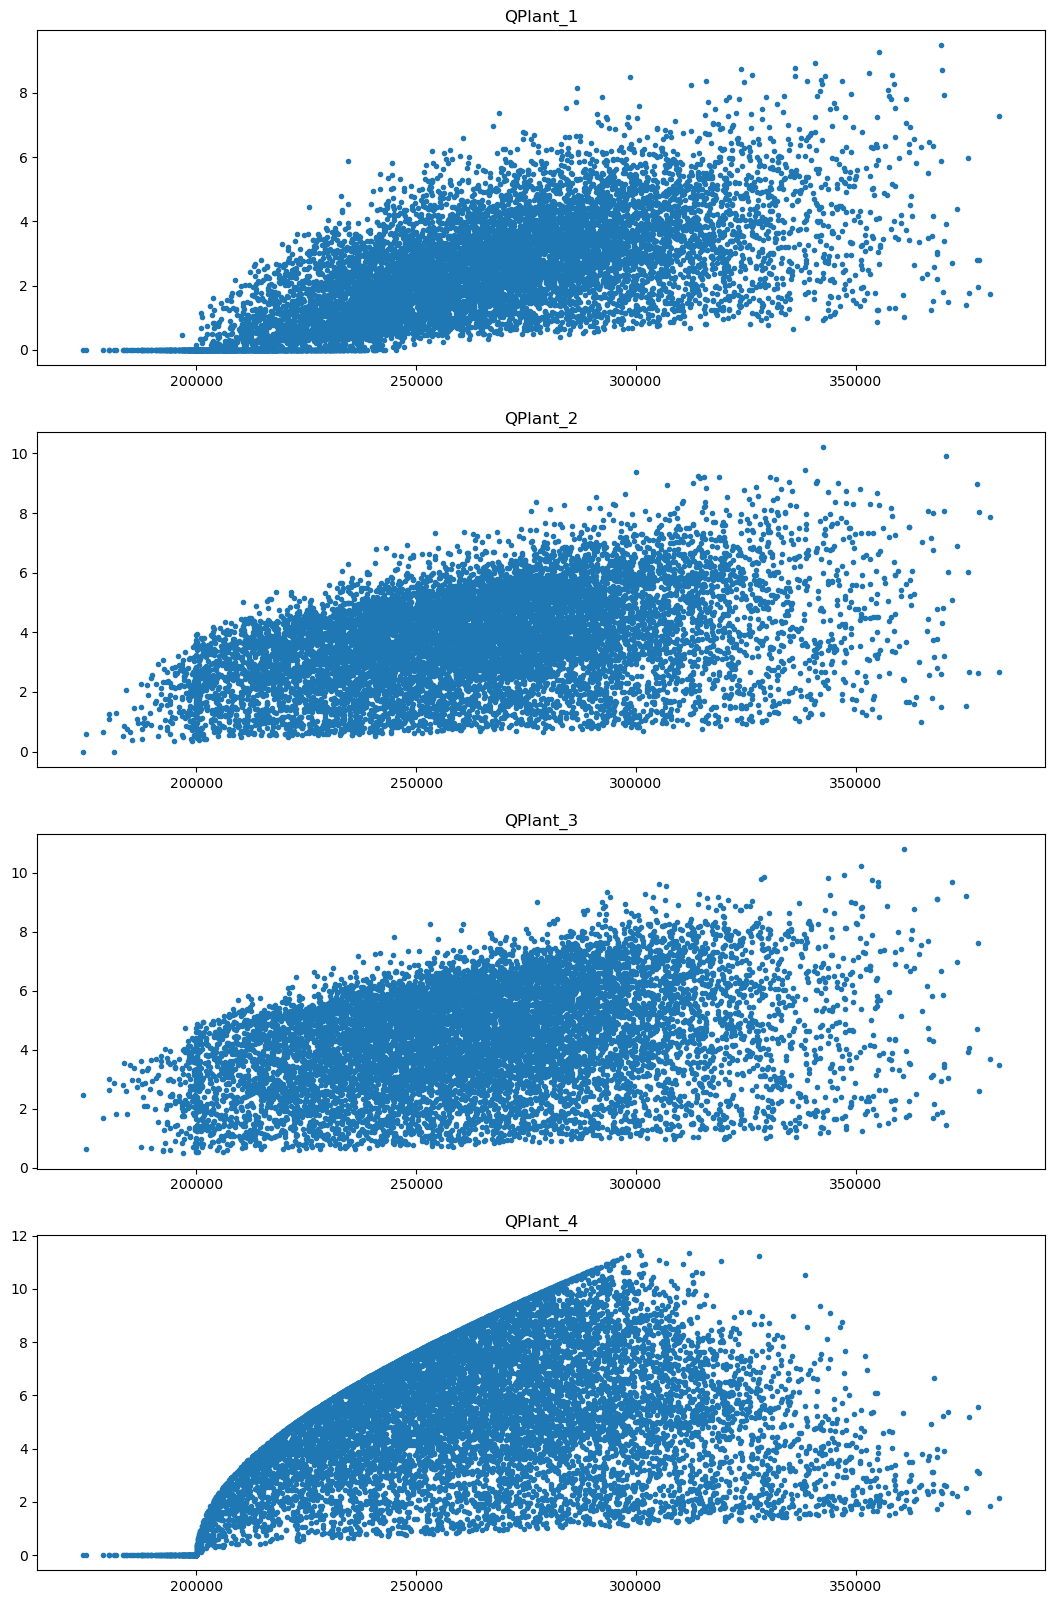

In [252]:
fig, ax = plt.subplots(4,1,figsize=(13,20))
for p in enumerate(Q_plants):
    ax[p[0]].plot(data['P_9'],data[p[1]], '.')
    ax[p[0]].set_title(p[1])
plt.show()

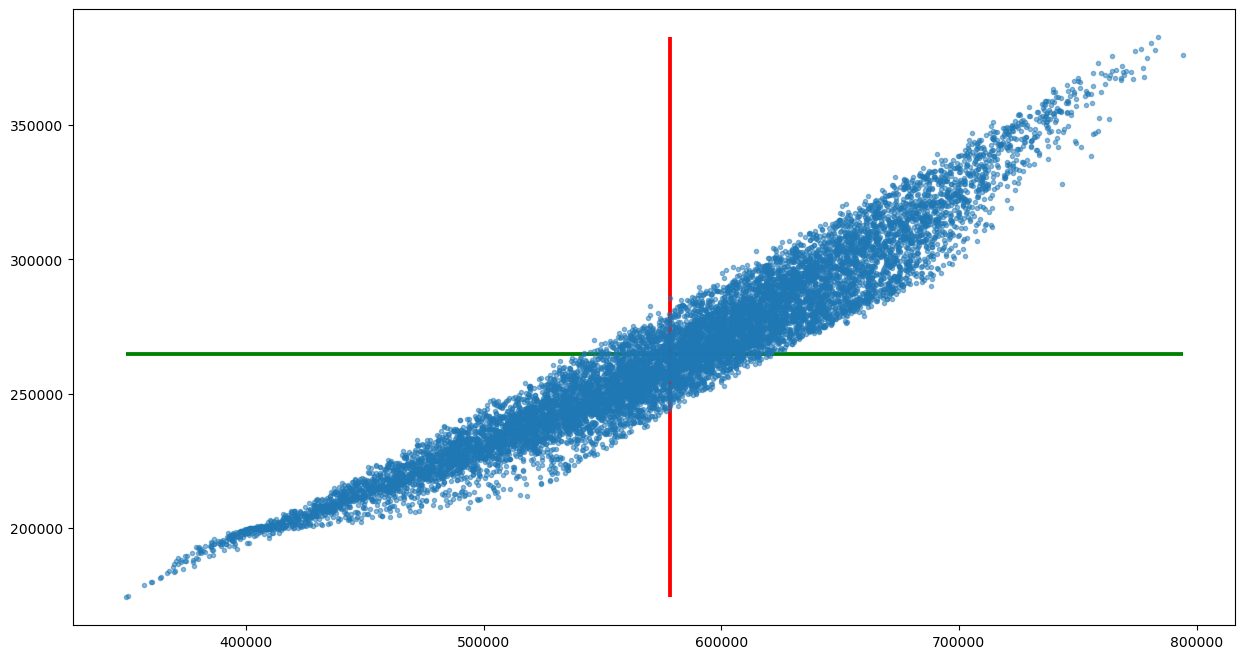

In [330]:
corr_plot(data['PGRS_1']+data['PGRS_2'],data['P_9'])

In [316]:
new_data = data.copy().join(target)
new_data['Q1/2'] = data['Q_1']/2
new_data['Q7/2'] = data['Q_7']/2
new_data_ver = new_data[(new_data['P_9']>200000) & (new_data['Q1/2']>0.6) &
                        (new_data['Q_2']>0.6) & (new_data['Q_3']>0.6) & (new_data['Q_4']>0.6) &
                        (new_data['Q_5']>0.6) & (new_data['Q7/2']>0.6)]
new_data_ver.head()

,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,...,valve_5,valve_6,valve_7,valve_8,valve_9,valve_10,valve_11,valve_12,Q1/2,Q7/2
2,17.970392,17.024003,5.578023,5.401818,2.074575,9.856532,335750.327166,336835.812259,233045.722524,223744.966298,...,0.532250,0.892400,0.434812,0.902982,0.841641,0.677520,0.222160,0.898325,0.647264,0.745678
8,12.994579,15.433294,4.420378,5.719775,4.813118,1.341604,322014.343248,326733.630725,268317.772356,223053.281674,...,1.000000,0.896946,0.382454,0.658888,0.995294,0.920283,0.634485,0.109736,0.765277,0.746785
11,16.312606,17.504505,4.607202,6.277989,2.213166,8.777766,326772.974529,339661.538385,227769.946196,221566.108620,...,0.485513,1.000000,0.943068,0.972991,0.715710,0.806289,0.241667,0.797124,0.640650,0.729523
13,12.862000,15.120761,4.910904,3.312214,6.011580,1.284851,332320.416228,334571.386620,250815.073462,229946.670084,...,0.664037,0.370041,0.889949,0.146132,0.748795,0.419864,0.682640,0.100829,0.709862,0.765097
17,18.197254,11.548383,3.372735,3.583866,6.345728,4.407826,341241.160629,302516.029584,251841.396228,223625.606234,...,0.908506,0.321526,0.477465,0.361146,0.601401,0.505439,0.796227,0.388223,0.726645,0.698594


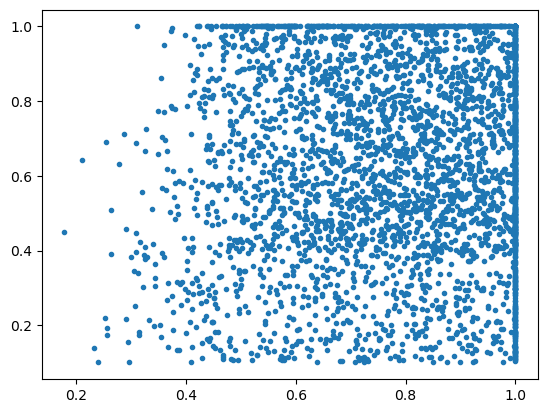

In [323]:
plt.plot(new_data_ver['valve_5'], new_data_ver['valve_10'],'.')
plt.show()    

In [288]:
data.shape

(11130, 24)

In [343]:
new_data_ver.drop(target_cols, axis=1).sample(1)

,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,...,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q1/2,Q7/2
10552,17.818057,17.861135,3.846483,5.812515,7.301823,6.399153,349252.290641,342091.760984,274525.950159,228422.90624,...,315809.157012,1.600212,0.750649,0.68896,0.74429,0.777345,2.960593,1.436869,0.800106,0.718435


In [345]:
test = data[data['P_9']<200000].iloc[np.random.randint(0,data[data['P_9']<200000].shape[0])]
test['Q1/2'] = test['Q_1']/2
test['Q7/2'] = test['Q_7']/2
test

QGRS_1           3.344781
QGRS_2           2.744921
QPlant_1         0.000000
QPlant_2         0.671775
QPlant_3         1.691212
QPlant_4         0.000000
PGRS_1      179176.255969
PGRS_2      177956.153658
P_1         161256.691630
P_2         155900.854572
P_3         161462.660052
P_4         165367.278779
P_5         162392.393824
P_6         160884.804925
P_7         174554.638353
P_8         155836.079516
P_9         178661.473179
Q_1              0.810851
Q_2              0.435248
Q_3              0.428602
Q_4              0.493592
Q_5              0.434601
Q_6              1.811725
Q_7              0.794265
Q1/2             0.405426
Q7/2             0.397133
Name: 3213, dtype: float64

In [329]:
test.index

Index(['QGRS_1', 'QGRS_2', 'QPlant_1', 'QPlant_2', 'QPlant_3', 'QPlant_4',
       'PGRS_1', 'PGRS_2', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7',
       'P_8', 'P_9', 'Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7'],
      dtype='object')

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lin_reg = Ridge()
train_data, test_data, train_values, test_values = train_test_split(data, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
lin_reg.fit(train_data, train_values)
mean_squared_error(test_values,lin_reg.predict(scaler.transform(test_data)))

0.016636519940320137

In [344]:
test.to_frame().T

,QGRS_1,QGRS_2,QPlant_1,QPlant_2,QPlant_3,QPlant_4,PGRS_1,PGRS_2,P_1,P_2,...,P_7,P_8,P_9,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7
7142,2.866531,8.020891,0.0,0.815039,3.953215,0.0,199784.929397,213522.67069,174752.854233,165908.118891,...,195341.334075,158170.206496,199797.77367,0.904926,0.465514,0.502287,0.516069,0.528998,2.011131,0.777878
